In [2]:
from pymoo.factory import get_visualization, get_reference_directions
from pymoo.factory import get_performance_indicator
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pandas.plotting import scatter_matrix
import pandas as pd
%matplotlib widget

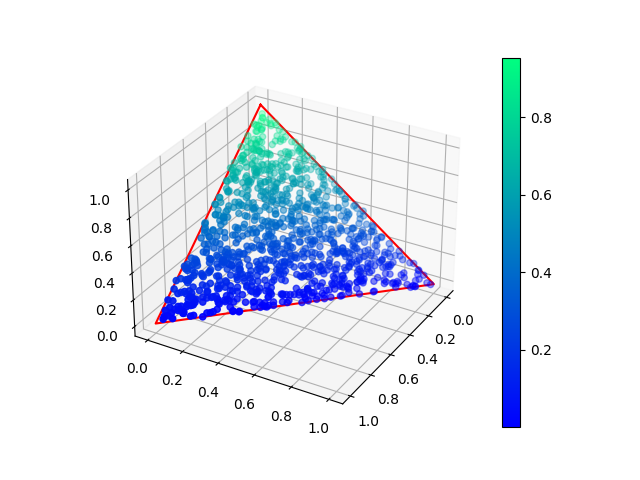

In [4]:
def rn():
    return random.rand()
def random_cord(dim):
    rnums = np.random.rand(dim-1)
    rnums = np.append(rnums, np.array([0,1]))
    rnums.sort()
    diffs = []
    for i in range(len(rnums)-1):
        diffs.append(rnums[i+1] - rnums[i])
    return diffs
def random_sphere_cord():
    a = np.random.uniform()
    b = np.random.uniform()
    c = np.random.uniform()
    
    root = 1 / (a**2+b**2+c**2)**(1/2)
    return [a * root, b * root, c * root]
    

def random_sampling(M, N):
    nums = []
    for i in range(N):
        nums.append(random_cord(M))
    hv = get_performance_indicator("hv", ref_point=np.array([1.01] * M))
    # print("Effectiveness:", round(hv.do(np.array(nums)) * 100, 2), "%")
    return round(hv.do(np.array(nums)) * 100, 2)

def convergance():
    X = [] 
    Y = []
    for i in range(10, 1000, 10):
        metric = 0
        for j in range(10):
            metric += random_sampling(3, i)
        metric /= 10
        print("Round", i, "Results:", metric)
        X.append(i)
        Y.append(metric)
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    ax = fig.add_subplot(111)  
    ax.plot(X, Y)
    plt.show()
# convergance()

def dirichlet(a, m):
    return np.random.dirichlet([a] * m)
    
# dirichlet(1, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot([0,0,1, 0], [0,1,0, 0], [1,0,0,1], c='red')
# img = ax.scatter(rd[:,0], rd[:,1], rd[:,2], c=rd[:,3], cmap=plt.hot())
points = []
for i in range(1000):
    v = dirichlet(1, 3)
    points.append(np.array(v))
p = np.array(points)
cm = plt.cm.get_cmap('winter')
X = p[:,0]
Y = p[:,1]
Z = p[:,2]
g = ax.scatter3D(X,Y,Z, c=Z, cmap=cm)
fig.colorbar(g)

ax.view_init(30,30)
plt.show()

    
    


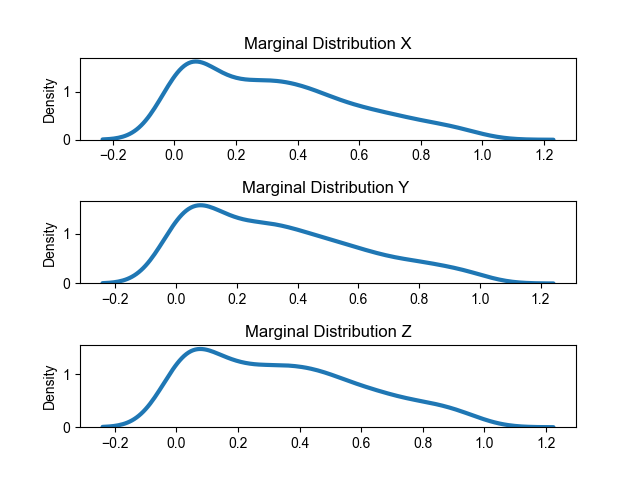

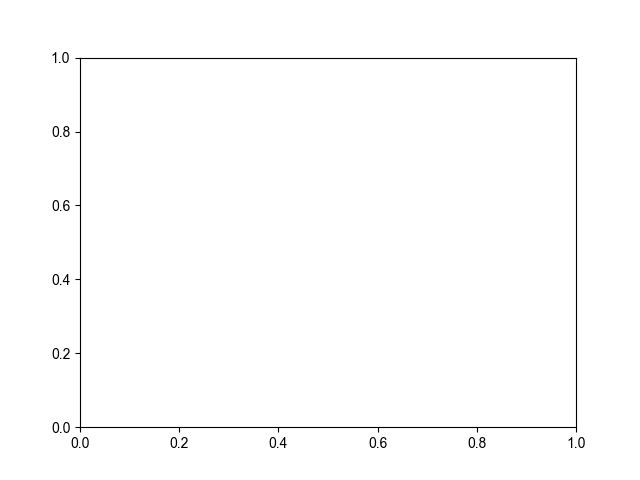

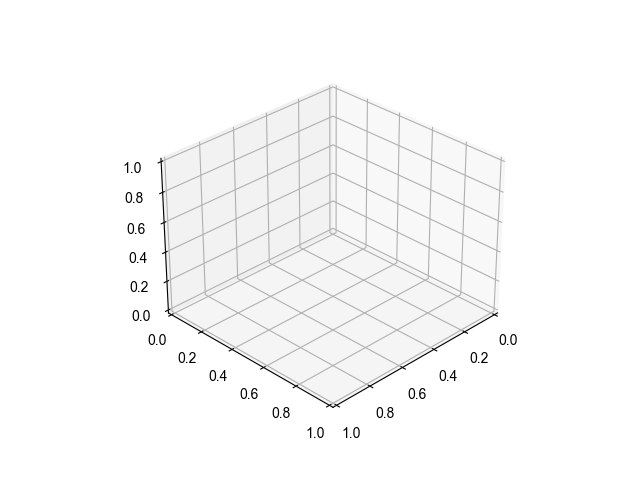

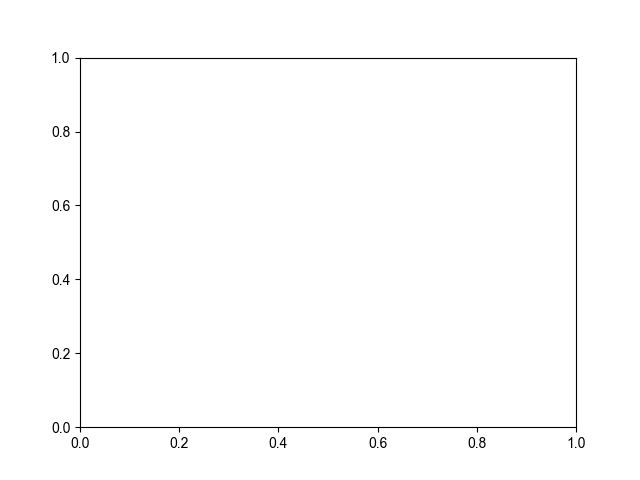

In [5]:
#Random
%load_ext autoreload
%autoreload 2
import methods as m
def random():
    N = 1000
    X1 = np.array([0.0] * N)
    Y1 = np.array([0.0] * N)
    Z1 = np.array([0.0] * N)
    
    fig, ax = plt.subplots(nrows=3, ncols=1)
    fig.subplots_adjust(hspace=.75)
    # ax2 = fig.add_subplot(111, projection='3d')
    for i in range(N):
        v = random_sphere_cord()
        X1[i] = v[0]**2
        Y1[i] = v[1]**2
        Z1[i] = v[2]**2

    
    m.drawKDPlot(X1, 0.3, 1, "Marginal Distribution X", 5, ax[0])
    m.drawKDPlot(Y1, 0.3, 1,"Marginal Distribution Y ", 5, ax[1])
    m.drawKDPlot(Z1, 0.3, 1, "Marginal Distribution Z", 5, ax[2])

    # ax2.scatter3D(X1, Y1, Z1)
    # plt.xlim(0,1)
    plt.show()
    
random()



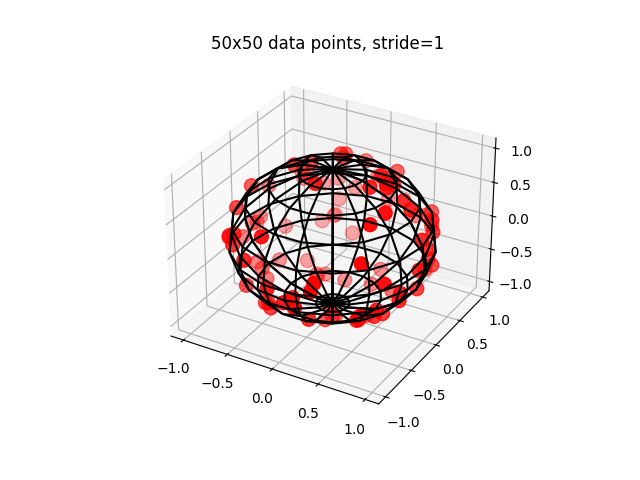

In [7]:
%matplotlib widget

fig,axes = plt.subplots(ncols=1,nrows=1,subplot_kw=dict(projection='3d'))
ax = axes

def conv(a):
	x = np.cos(a[0]) * np.sin(a[1])
	y = np.sin(a[0]) * np.sin(a[1])
	z = np.cos(a[1])
	return [x,y,z]

def draw_sphere():
	N=50
	stride=1
	u = np.linspace(0, np.pi, 10) #vertical
	v = np.linspace(0, 2*  np.pi, 20)
	x = np.outer(np.cos(u), np.sin(v))
	y = np.outer(np.sin(u), np.sin(v))
	z = np.outer(np.ones(np.size(u)), np.cos(v))
	# ax.plot_surface(x, y, z, linewidth=0.0, cstride=stride, rstride=stride)
	ax.plot_wireframe(x, y, z, color='k', rstride=stride, cstride=stride)
	ax.set_title('{0}x{0} data points, stride={1}'.format(N,stride))
draw_sphere()
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

def draw_points():
	xi, yi, zi = sample_spherical(100)
	ax.scatter(xi, yi, zi, s=100, c='r', zorder=10)

draw_points()
